# 1. Import a 311 NYC service request.

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
from pandas import Series
import datetime as dt #to convert Created Date and Closed Date to datetime format
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing the data set

df_Service_Requests = pd.read_csv("C:\\Venkat\\Data Science with Python - SimpliLearn\\Data Science with Python Two\\311_Service_Requests_from_2010_to_Present.csv")

C:\Users\vkakarla\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#viewing the first 5 records
df_Service_Requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# Setting options to display all columns 
pd.set_option('display.max_columns', None)
df_Service_Requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
# Some of the columns contains "Unspecified" as value. 
# Replacing all those vallues with NaN, so that we can get actual null counts.

df_Service_Requests.replace('Unspecified',np.NaN,inplace=True)
df_Service_Requests.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,NaN,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,NaN,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,NaN,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
df_Service_Requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null object
Closed Date                       298534 non-null object
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      29

# 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [7]:
#Checking the type of Created Date and Closed Date

print('Created Date data type is', df_Service_Requests['Created Date'].dtype)
print('Closed Date data type is', df_Service_Requests['Closed Date'].dtype)


Created Date data type is object
Closed Date data type is object


In [8]:
#Converting the columns ‘Created Date’ and Closed Date’ to datetime datatype

df_Service_Requests['Created Date'] = pd.to_datetime(df_Service_Requests['Created Date'])
df_Service_Requests['Closed Date'] = pd.to_datetime(df_Service_Requests['Closed Date'])

In [9]:
#Checking the type of Created Date and Closed Date after conversion

print('Created Date data type is', df_Service_Requests['Created Date'].dtype)
print('Closed Date data type is', df_Service_Requests['Closed Date'].dtype)

Created Date data type is datetime64[ns]
Closed Date data type is datetime64[ns]


In [10]:
# creating a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

# Adding new column next to 'Closed Date' column 
df_Service_Requests.insert(3, 'Request Closing Time','')

# passing values to the new column

df_Service_Requests['Request Closing Time'] = (df_Service_Requests['Closed Date'] -df_Service_Requests['Created Date']) / pd.Timedelta(hours=1)


#Creating another new column ‘Request_Closing_Time_dt’ as the time elapsed between request creation and request closing as datetime column

df_Service_Requests.insert(4, 'Request_Closing_Time_dt','')
df_Service_Requests['Request_Closing_Time_dt'] = df_Service_Requests['Closed Date'] - df_Service_Requests['Created Date']

#checking the new dataset
df_Service_Requests.head()



,Unique Key,Created Date,Closed Date,Request Closing Time,Request_Closing_Time_dt,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,0.920833,00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,NaN,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,1.437778,01:26:16,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,4.858611,04:51:31,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,NaN,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,7.753889,07:45:14,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,NaN,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,3.450556,03:27:02,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [11]:
#Checking the dataset  shape and size

print(df_Service_Requests.shape)
print(df_Service_Requests.size)
df_Service_Requests.describe()

(300698, 55)
16538390


,Unique Key,Request Closing Time,Request_Closing_Time_dt,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School Region,School Code,School Zip,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298534.000000,298534,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,4.314398,0 days 04:18:51.832782,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,6.089484,0 days 06:05:22.141833,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,0.016667,0 days 00:01:00,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,1.275833,0 days 01:16:33,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,2.715417,0 days 02:42:55.500000,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,5.350000,0 days 05:21:00,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,592.872778,24 days 16:52:22,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


# 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [12]:
# Checking for null values if any
df_Service_Requests.isnull().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Request Closing Time               True
Request_Closing_Time_dt            True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True


In [13]:
#Checking the counts of null for ech column
df_Service_Requests_Counts = pd.DataFrame(df_Service_Requests.isnull().sum(),columns=['Null_Count'])
df_Service_Requests_Counts.insert(0,'Field_Names','')
df_Service_Requests_Counts['Field_Names'] = df_Service_Requests.columns
df_Service_Requests_Counts["Total_Rows"]=300698
df_Service_Requests_Counts["Null_Percentage"]=df_Service_Requests_Counts["Null_Count"]/df_Service_Requests_Counts["Total_Rows"]*100
df_Service_Requests_Counts

,Field_Names,Null_Count,Total_Rows,Null_Percentage
Unique Key,Unique Key,0,300698,0.000000
Created Date,Created Date,0,300698,0.000000
Closed Date,Closed Date,2164,300698,0.719659
Request Closing Time,Request Closing Time,2164,300698,0.719659
Request_Closing_Time_dt,Request_Closing_Time_dt,2164,300698,0.719659
Agency,Agency,0,300698,0.000000
Agency Name,Agency Name,0,300698,0.000000
Complaint Type,Complaint Type,0,300698,0.000000
Descriptor,Descriptor,5914,300698,1.966757
Location Type,Location Type,131,300698,0.043565


In [14]:
#Checking the data info
df_Service_Requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 55 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Request Closing Time              298534 non-null float64
Request_Closing_Time_dt           298534 non-null timedelta64[ns]
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersec

In [15]:
#checking the column names/headers

df_Service_Requests.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Request Closing Time',
       'Request_Closing_Time_dt', 'Agency', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
 

In [16]:
#Checking the index range of the dataset
df_Service_Requests.index

RangeIndex(start=0, stop=300698, step=1)

In [17]:
#Describing the dataset 
df_Service_Requests.describe(include = 'all')

,Unique Key,Created Date,Closed Date,Request Closing Time,Request_Closing_Time_dt,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
count,3.006980e+05,300698,298534,298534.000000,298534,300698,300698,300698,294784,300567,298083.000000,256288,256288,251419,250919,43858,43362,297883,298084,349,298527,300698,300695,300698,298511,300698,298124,2.971580e+05,297158.000000,1,298124,1,1,0.0,0.0,1,1,1,1,0.0,300698,0.0,0.0,0.0,0.0,243,243,213,213,0.0,1,2,297158.000000,297158.000000,297158
unique,NaN,259493,237165,NaN,NaN,1,3,24,45,18,NaN,107652,7320,5982,5823,4413,4172,5,53,116,1,4,259851,18,237895,75,5,NaN,NaN,1,5,1,1,NaN,NaN,1,1,1,1,NaN,1,NaN,NaN,NaN,NaN,29,34,2,160,NaN,1,2,NaN,NaN,126048
top,NaN,2015-06-06 22:23:00,2015-11-08 07:34:00,NaN,NaN,NYPD,New York City Police Department,Blocked Driveway,Loud Music/Party,Street/Sidewalk,NaN,1207 BEACH AVENUE,BROADWAY,BROADWAY,BEND,BROADWAY,BROADWAY,ADDRESS,BROOKLYN,CENTRAL PARK,Precinct,Closed,11-07-15 7:34,The Police Department responded to the complai...,11-08-15 7:34,12 MANHATTAN,BROOKLYN,NaN,NaN,Alley Pond Park - Nature Center,BROOKLYN,Alley Pond Park - Nature Center,Q001,NaN,NaN,7182176034,"Grand Central Parkway, near the soccer field",QUEENS,NY,NaN,N,NaN,NaN,NaN,NaN,FDR Dr,East/Queens Bound,Roadway,East 96th St (Exit 14) - Triborough Br (Exit 17),NaN,Manhattan Bound,St. George Terminal (Staten Island),NaN,NaN,"(40.83036235589997, -73.86602154214397)"
freq,NaN,9,24,NaN,NaN,300698,300690,77044,61430,249299,NaN,904,3237,4338,4391,672,1358,238644,98307,67,298527,298471,9,90490,24,12390,98307,NaN,NaN,1,98307,1,1,NaN,NaN,1,1,1,1,NaN,300698,NaN,NaN,NaN,NaN,33,21,162,6,NaN,1,1,NaN,NaN,902
first,NaN,2015-03-29 00:33:01,2015-03-29 00:57:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-31 23:59:45,2016-01-03 16:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.130054e+07,NaN,NaN,4.314398,0 days 04:18:51.832782,NaN,NaN,NaN,NaN,NaN,10848.888645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630,NaN
std,5.738547e+05,NaN,NaN,6.089484,0 days 06:05:22.141833,NaN,NaN,NaN,NaN,NaN,583.182081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454,NaN
min,3.027948e+07,NaN,NaN,0.016667,0 days 00:01:00,NaN,NaN,NaN,NaN,NaN,83.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937,NaN
25%,3.080118e+07,NaN,NaN,1.275833,0 days 01:16:33,NaN,NaN,NaN,NaN,NaN,10310.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [18]:
#checking the unique values of each columns
df_Service_Requests.nunique()

Unique Key                        300698
Created Date                      259493
Closed Date                       237165
Request Closing Time               47608
Request_Closing_Time_dt            47608
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  107652
Street Name                         7320
Cross Street 1                      5982
Cross Street 2                      5823
Intersection Street 1               4413
Intersection Street 2               4172
Address Type                           5
City                                  53
Landmark                             116
Facility Type                          1
Status                                 4
Due Date                          259851
Resolution Description                18
Resolution Actio

In [19]:
# Dropping some columns that have more missing values and creating a new data frame
# Dropping columns with more than 70% missing values

df_Service_Requests_drop_columns = df_Service_Requests_Counts.loc[df_Service_Requests_Counts['Null_Percentage']>70,['Field_Names']]

df_Service_Requests_drop_columns['Field_Names'].values
df_Service_Requests2 = df_Service_Requests.copy()
print(df_Service_Requests.shape)
print(df_Service_Requests2.shape)
df_Service_Requests2.drop(df_Service_Requests_drop_columns['Field_Names'].values, axis=1,inplace =True)
#df_Service_Requests_Counts

# Let us remove drop the records if the columns "Created Date", "Closed Date" and "City" have any missing values

df_Service_Requests2.dropna(subset=['Created Date','Closed Date','City','Location Type'], inplace=True)

print(df_Service_Requests.shape)
print(df_Service_Requests2.shape)

(300698, 55)
(300698, 55)
(300698, 55)
(297906, 31)


In [20]:
non_category_columns = ['Created Date', 'Closed Date', 'Request Closing Time','Request_Closing_Time_dt']


for columns in df_Service_Requests2.columns:
    if df_Service_Requests2[columns].nunique() < 210 and columns not in non_category_columns:
        df_Service_Requests2[columns] = df_Service_Requests2[columns].astype('category')

In [21]:
#Checking the distinct values of few columns

print("Unique values in 'Agency Name' column are : \n",df_Service_Requests2['Agency Name'].unique(),'\n')
print("Unique values in 'Complaint Type' column are :\n",df_Service_Requests['Complaint Type'].unique(),'\n')
print("Unique values in 'Location Type' column are : \n",df_Service_Requests['Location Type'].unique(),'\n')
print("Unique values in 'City' column are : \n",df_Service_Requests['City'].unique(),'\n')



Unique values in 'Agency Name' column are : 
 [New York City Police Department]
Categories (1, object): [New York City Police Department] 

Unique values in 'Complaint Type' column are :
 ['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial' 'Noise - House of Worship'
 'Posting Advertisement' 'Noise - Vehicle' 'Animal Abuse' 'Vending'
 'Traffic' 'Drinking' 'Bike/Roller/Skate Chronic' 'Panhandling'
 'Noise - Park' 'Homeless Encampment' 'Urinating in Public' 'Graffiti'
 'Disorderly Youth' 'Illegal Fireworks' 'Ferry Complaint' 'Agency Issues'
 'Squeegee' 'Animal in a Park'] 

Unique values in 'Location Type' column are : 
 ['Street/Sidewalk' 'Club/Bar/Restaurant' 'Store/Commercial'
 'House of Worship' 'Residential Building/House' 'Residential Building'
 'Park/Playground' 'Vacant Lot' 'House and Store' 'Highway' 'Commercial'
 'Roadway Tunnel' 'Subway Station' 'Parking Lot' 'Bridge' 'Terminal' nan
 'Ferry' 'Park'] 

Unique values in 'City' 

# Doing basic exploratory data analysis

In [22]:
# Checking complaint counts for different cities
complaint_dist =df_Service_Requests2.groupby('Complaint Type').City.count()

In [23]:
print(complaint_dist)

Complaint Type
Animal Abuse                  7764
Animal in a Park                 1
Bike/Roller/Skate Chronic      422
Blocked Driveway             76715
Derelict Vehicle             17534
Disorderly Youth               286
Drinking                      1271
Graffiti                       113
Homeless Encampment           4406
Illegal Fireworks              168
Illegal Parking              74276
Noise - Commercial           35180
Noise - House of Worship       927
Noise - Park                  4014
Noise - Street/Sidewalk      47977
Noise - Vehicle              17024
Panhandling                    305
Posting Advertisement          647
Squeegee                         4
Traffic                       4489
Urinating in Public            591
Vending                       3792
Name: City, dtype: int64


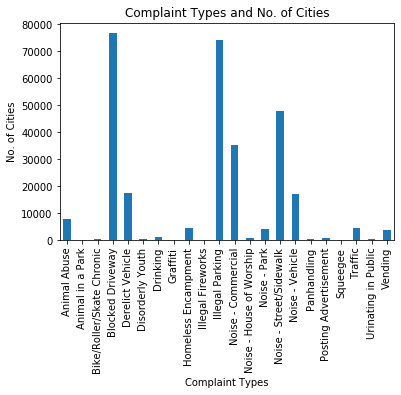

In [24]:
# Graph to show diff Complaint Types and the count of cities under each Complaint Type

x=df_Service_Requests2.groupby('Complaint Type').City.count()
x.plot(kind="bar")
plt.xlabel("Complaint Types")
plt.ylabel("No. of Cities")
plt.title("Complaint Types and No. of Cities")
plt.show()

## Conclusion 1: 
#### More complaints are under the complaint type "Blocked Driveway" followed by "Illegal Parking" and "Noise - Street/Sidewalk"

[Text(0, 0, 'Animal Abuse'),
 Text(0, 0, 'Animal in a Park'),
 Text(0, 0, 'Bike/Roller/Skate Chronic'),
 Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Derelict Vehicle'),
 Text(0, 0, 'Disorderly Youth'),
 Text(0, 0, 'Drinking'),
 Text(0, 0, 'Graffiti'),
 Text(0, 0, 'Homeless Encampment'),
 Text(0, 0, 'Illegal Fireworks'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Noise - House of Worship'),
 Text(0, 0, 'Noise - Park'),
 Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Noise - Vehicle'),
 Text(0, 0, 'Panhandling'),
 Text(0, 0, 'Posting Advertisement'),
 Text(0, 0, 'Squeegee'),
 Text(0, 0, 'Traffic'),
 Text(0, 0, 'Urinating in Public'),
 Text(0, 0, 'Vending')]

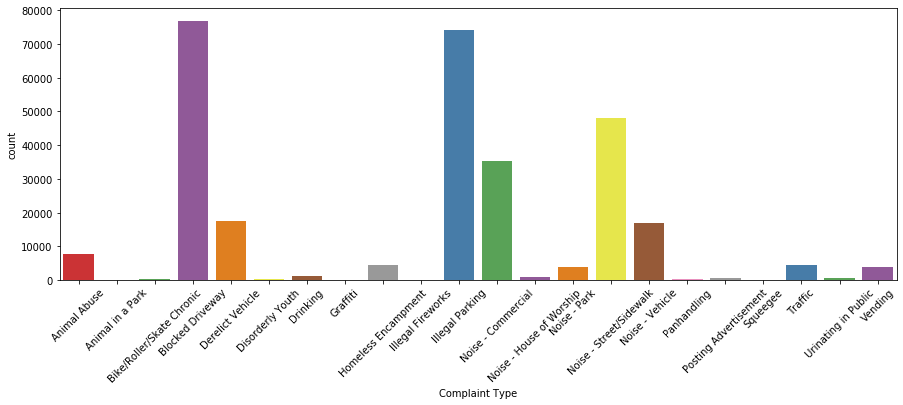

In [25]:
# # Count plot

# only apply with categorical values
# give the count details
# univariate

#sns.countplot(x='Complaint Type',data=df_Service_Requests2).set_xticklabels(get_xticklabels(), rotation=45)

plt.figure(figsize=(15,5))
chart = sns.countplot(x='Complaint Type',data=df_Service_Requests2,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'Bridge'),
 Text(0, 0, 'Club/Bar/Restaurant'),
 Text(0, 0, 'Commercial'),
 Text(0, 0, 'Highway'),
 Text(0, 0, 'House and Store'),
 Text(0, 0, 'House of Worship'),
 Text(0, 0, 'Park'),
 Text(0, 0, 'Park/Playground'),
 Text(0, 0, 'Parking Lot'),
 Text(0, 0, 'Residential Building'),
 Text(0, 0, 'Residential Building/House'),
 Text(0, 0, 'Roadway Tunnel'),
 Text(0, 0, 'Store/Commercial'),
 Text(0, 0, 'Street/Sidewalk'),
 Text(0, 0, 'Subway Station'),
 Text(0, 0, 'Vacant Lot')]

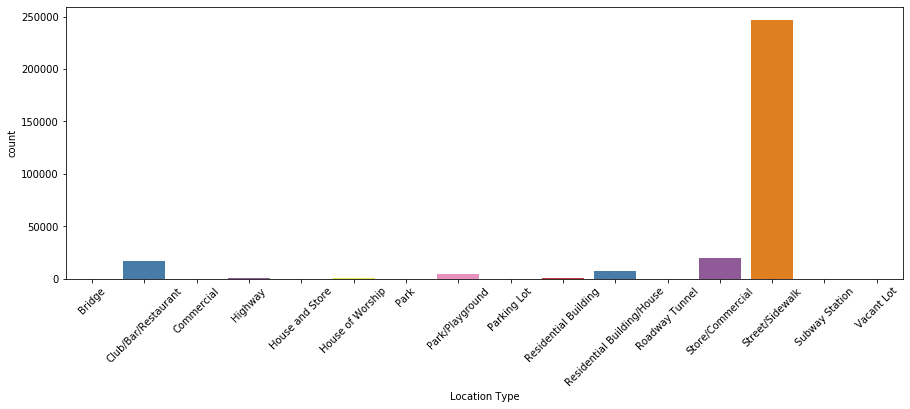

In [26]:
plt.figure(figsize=(15,5))
chart = sns.countplot(x='Location Type',data=df_Service_Requests2,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [27]:
# No of Complaints by Location Type

location_dist = df_Service_Requests2.groupby('Location Type')['City'].count()
location_count = df_Service_Requests2['Location Type'].count()
location_st_sw_count = location_dist['Street/Sidewalk']

#print(location_dist)
print("Total Complaints are: ", location_count)
print("No. of Complaints from the Location Type 'Street/Sidewalk' are: ",location_st_sw_count)

print("Percentage of Complaints from the Location Type 'Street/Sidewalk' is {:.2%}".format(location_st_sw_count/location_count))


Total Complaints are:  297906
No. of Complaints from the Location Type 'Street/Sidewalk' are:  247076
Percentage of Complaints from the Location Type 'Street/Sidewalk' is 82.94%


## Conclusion 2:
#### More than 80% complaints are under the Location Type = 'Street/Sidewalk'

In [28]:
# City wise complaints distribution

city_dist = pd.DataFrame(df_Service_Requests2.groupby('City')['Complaint Type'].count())
#df_Service_Requests2.columns
city_dist.rename(columns={'Complaint Type': 'Complaints_Count'}, inplace=True)
city_dist['Complaints %']=city_dist['Complaints_Count']/city_dist['Complaints_Count'].sum()*100

city_dist


,Complaints_Count,Complaints %
City,,
ARVERNE,220,0.073849
ASTORIA,6330,2.124831
Astoria,716,0.240344
BAYSIDE,1218,0.408854
BELLEROSE,374,0.125543
BREEZY POINT,30,0.010070
BRONX,40683,13.656321
BROOKLYN,98251,32.980537
CAMBRIA HEIGHTS,477,0.160118


In [29]:
print("No of. Cities that have more than 1% of the overall complaints are"
      , city_dist.loc[city_dist["Complaints %"]>1,["Complaints %"]].count().values, end ="")
print(" with a share of complaint percent"
      ,city_dist.loc[city_dist["Complaints %"]>1,["Complaints %"]].sum().values)

print("No of. Cities that have less than 1% of the overall complaints are"
      , city_dist.loc[city_dist["Complaints %"]<=1,["Complaints %"]].count().values,end="")
print(" with a share of complaint percent"
      ,city_dist.loc[city_dist["Complaints %"]<=1,["Complaints %"]].sum().values)


No of. Cities that have more than 1% of the overall complaints are [10] with a share of complaint percent [83.8519533]
No of. Cities that have less than 1% of the overall complaints are [43] with a share of complaint percent [16.1480467]


## Conclusion 3:
#### Approximately 20% the Cities account for more than 80% of the complaints
#### Rest of the 80% cities account for less than 20% of the complaints
#### Major complaints are from BROOKLYN  (32.9%) followed by NEW YORK (22.1%) and BRONX (13.6%)

In [30]:
df_Service_Requests2.groupby('Agency Name')['Complaint Type'].count()

Agency Name
New York City Police Department    297906
Name: Complaint Type, dtype: int64

## Conclusion 4:
#### All most all the complaints are under the agency 'New York City Police Department'

In [31]:
df_Service_Requests2.groupby('Address Type')['Complaint Type'].count()

Address Type
ADDRESS         238507
BLOCKFACE        12011
INTERSECTION     43339
LATLONG           3460
PLACENAME          350
Name: Complaint Type, dtype: int64

[Text(0, 0, 'ADDRESS'),
 Text(0, 0, 'BLOCKFACE'),
 Text(0, 0, 'INTERSECTION'),
 Text(0, 0, 'LATLONG'),
 Text(0, 0, 'PLACENAME')]

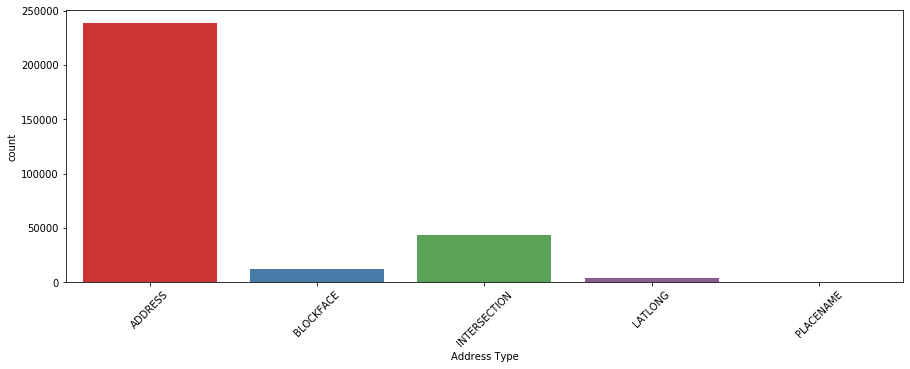

In [32]:
plt.figure(figsize=(15,5))
chart = sns.countplot(x='Address Type',data=df_Service_Requests2,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [33]:
Top_Complaints=df_Service_Requests2.dropna(subset=["Complaint Type"])
Top_Complaints=df_Service_Requests2.groupby("Complaint Type")
Top_Complaints2 = Top_Complaints.size().sort_values(ascending = False)
Top_Complaints2 = Top_Complaints2.to_frame('count').reset_index()

Top_Complaints2
Top_Complaints2.head(10)

,Complaint Type,count
0,Blocked Driveway,76715
1,Illegal Parking,74276
2,Noise - Street/Sidewalk,47977
3,Noise - Commercial,35180
4,Derelict Vehicle,17534
5,Noise - Vehicle,17024
6,Animal Abuse,7764
7,Traffic,4489
8,Homeless Encampment,4406
9,Noise - Park,4014


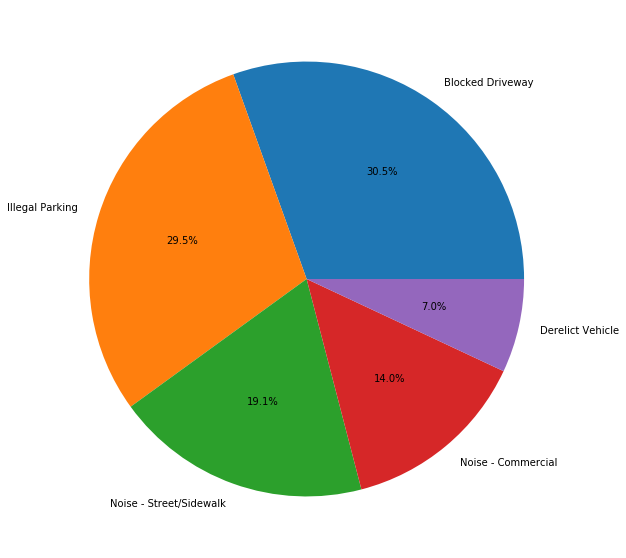

In [34]:
Top_Complaints2 = Top_Complaints2.head()
plt.figure(figsize=(10,10))
plt.pie(Top_Complaints2['count'],labels=Top_Complaints2["Complaint Type"], autopct="%1.1f%%")
plt.show()

C:\Users\vkakarla\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


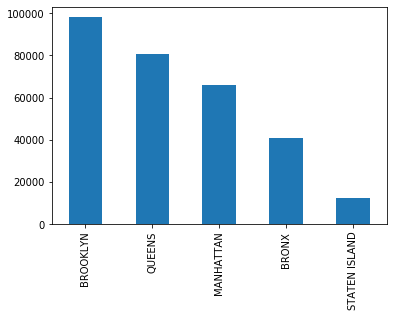

In [35]:
# Looking at No. of Complaints per each Borough

df_Service_Requests2['Borough'].value_counts().plot('bar')


[Text(0, 0, 'BRONX'),
 Text(0, 0, 'BROOKLYN'),
 Text(0, 0, 'MANHATTAN'),
 Text(0, 0, 'QUEENS'),
 Text(0, 0, 'STATEN ISLAND')]

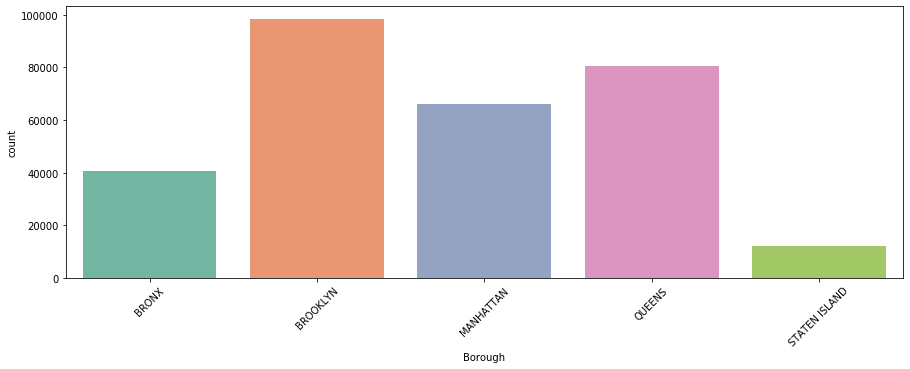

In [36]:
plt.figure(figsize=(15,5))
chart = sns.countplot(x='Borough',data=df_Service_Requests2,palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

## Conclusion 5:
#### Brooklyn has the highest No. of Complaints followed by Queens and Manhattan

# 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [37]:
df_Service_Requests2['Request Closing Time'].describe()

count    297906.000000
mean          4.306074
std           6.078652
min           0.016667
25%           1.273056
50%           2.709444
75%           5.339722
max         592.872778
Name: Request Closing Time, dtype: float64

In [38]:
df_Service_Requests2['Request_Closing_Time_dt'].describe()

count                    297906
mean     0 days 04:18:21.867038
std      0 days 06:04:43.146383
min             0 days 00:01:00
25%             0 days 01:16:23
50%             0 days 02:42:34
75%             0 days 05:20:23
max            24 days 16:52:22
Name: Request_Closing_Time_dt, dtype: object

In [39]:
# Let us convert Request_Closing_Time_dt from days to hours

df_Service_Requests2['Request_Closing_Hours'] = df_Service_Requests2['Request_Closing_Time_dt'].astype('timedelta64[h]')+1
df_Service_Requests2[['Request_Closing_Time_dt','Request_Closing_Hours']].head()

,Request_Closing_Time_dt,Request_Closing_Hours
0,00:55:15,1.0
1,01:26:16,2.0
2,04:51:31,5.0
3,07:45:14,8.0
4,03:27:02,4.0


In [40]:

# Borough wise

Closing_by_Borough = df_Service_Requests2.groupby(['Borough','Complaint Type'],as_index=False)['Request_Closing_Hours'].mean().sort_values(['Borough','Request_Closing_Hours'],ascending=[True, False])

Closing_by_Borough.rename(columns={'Request_Closing_Hours': 'Average_Request_Closing_Hours'}, inplace=True)

Closing_by_Borough

,Borough,Complaint Type,Average_Request_Closing_Hours
16,BRONX,Panhandling,14.842105
4,BRONX,Derelict Vehicle,9.730907
7,BRONX,Graffiti,9.333333
8,BRONX,Homeless Encampment,7.967347
0,BRONX,Animal Abuse,7.840170
...,...,...,...
100,STATEN ISLAND,Noise - House of Worship,3.058824
108,STATEN ISLAND,Urinating in Public,2.857143
105,STATEN ISLAND,Posting Advertisement,2.071845
89,STATEN ISLAND,Animal in a Park,NaN


In [41]:

# Location Type wise

Closing_by_Location_Type = df_Service_Requests2.groupby(['Location Type','Complaint Type'],as_index=False)['Request_Closing_Hours'].mean().sort_values(['Location Type','Request_Closing_Hours'],ascending=[True, False])

Closing_by_Location_Type.rename(columns={'Request_Closing_Hours': 'Average_Request_Closing_Hours'}, inplace=True)

pd.set_option('display.max_rows', None)
Closing_by_Location_Type

,Location Type,Complaint Type,Average_Request_Closing_Hours
8,Bridge,Homeless Encampment,4.000000
0,Bridge,Animal Abuse,NaN
1,Bridge,Animal in a Park,NaN
2,Bridge,Bike/Roller/Skate Chronic,NaN
3,Bridge,Blocked Driveway,NaN
4,Bridge,Derelict Vehicle,NaN
5,Bridge,Disorderly Youth,NaN
6,Bridge,Drinking,NaN
7,Bridge,Graffiti,NaN
9,Bridge,Illegal Fireworks,NaN


# 4. Perform a statistical test for the following:
##### Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

### a. Whether the average response time across complaint types is similar or not (overall)
### b. Are the type of complaint or service requested and location related?

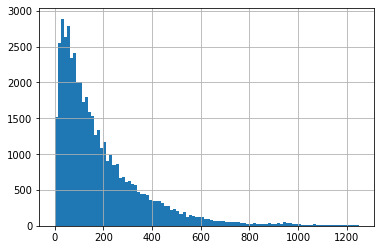

In [42]:
df_Service_Requests2['Request_Closing_Minutes'] = df_Service_Requests2['Request_Closing_Time_dt'].astype('timedelta64[m]')+1

#First, let us look at one Complaint Type and its distribution
# Let us look take a loo at "Noise - Street/Sidewalk"
complaint_noise_st_sw = df_Service_Requests2[df_Service_Requests2['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Minutes']
complaint_noise_st_sw.hist(bins=100,range=(0,1250))

C:\Users\vkakarla\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


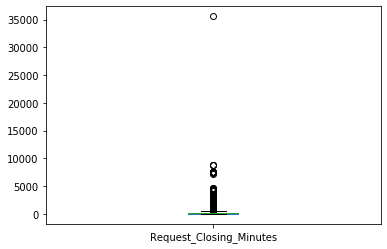

In [43]:
complaint_noise_st_sw.plot('box')

In [44]:
complaint_noise_st_sw.describe()

count    47977.000000
mean       207.028430
std        326.639027
min          3.000000
25%         61.000000
50%        133.000000
75%        259.000000
max      35573.000000
Name: Request_Closing_Minutes, dtype: float64

#### Looking at the above summary and the histogram and box plot, we can understand that there are outliers in the data. 
#### It is right skewed data.
#### Let us remove the skewness using log


In [45]:
df_Service_Requests_log = {}
for complaint in df_Service_Requests2['Complaint Type'].unique():
    df_Service_Requests_log[complaint] = np.log(df_Service_Requests2[df_Service_Requests2['Complaint Type']==complaint]['Request_Closing_Minutes'])
    

In [46]:
df_Service_Requests_log.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee', 'Animal in a Park'])

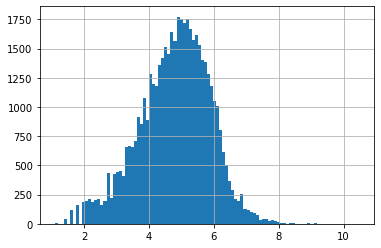

In [47]:
df_Service_Requests_log['Noise - Street/Sidewalk'].hist(bins=100)

C:\Users\vkakarla\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


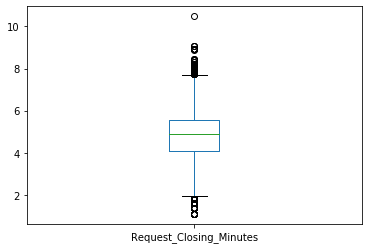

In [48]:
df_Service_Requests_log['Noise - Street/Sidewalk'].plot('box')

#### The above histogram looks like a bell curve which means that there is no skewness, boxplot also shows the same.
#### Now the skewness is removed from the data after using log.

In [49]:
# We need conduct an One-Way ANOVA  Test since we need to compare the average of more than two groups.
# Looking at mean and standard deviation of each complaint type

print("                               Mean  Std Dev")
for complaint in df_Service_Requests_log.keys():
    print(complaint.ljust(30, " "), end =" ")
    print("{:.2}  ".format(df_Service_Requests_log[complaint].mean()), end =" "),
    print("{:.2}  ".format(df_Service_Requests_log[complaint].std()))
    

                               Mean  Std Dev
Noise - Street/Sidewalk        4.8   1.1  
Blocked Driveway               5.2   0.97  
Illegal Parking                5.1   1.1  
Derelict Vehicle               5.4   1.2  
Noise - Commercial             4.7   1.1  
Noise - House of Worship       4.6   1.2  
Posting Advertisement          4.2   1.2  
Noise - Vehicle                4.9   1.1  
Animal Abuse                   5.2   1.0  
Vending                        5.0   1.1  
Traffic                        4.7   1.2  
Drinking                       5.0   1.0  
Bike/Roller/Skate Chronic      4.9   1.2  
Panhandling                    5.0   1.1  
Noise - Park                   4.8   1.1  
Homeless Encampment            5.1   1.0  
Urinating in Public            4.8   1.1  
Graffiti                       5.5   1.1  
Disorderly Youth               4.9   1.0  
Illegal Fireworks              4.5   1.2  
Squeegee                       5.3   0.85  
Animal in a Park               9.9   nan  


## One-Way ANOVA

#### Null Hypothesis (H0): The average response time across complaint types is same (overall).

#### Alternate Hypothesis (H1): The average response time across complaint types is not same (overall).

### let us condust the test for top "5"  complaints types

###### Let us choose "level of significane (alpha)" at 5% which give 95% confidence of the test


In [50]:
df_Service_Requests_log.keys() 

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee', 'Animal in a Park'])

In [51]:
# let us import the f_oneway from scipy.stats library for the test

from scipy.stats import f_oneway

F_Statistic, p_value = f_oneway(df_Service_Requests_log['Noise - Street/Sidewalk'],
                   df_Service_Requests_log['Blocked Driveway'],
                   df_Service_Requests_log['Illegal Parking'],
                   df_Service_Requests_log['Derelict Vehicle'],
                   df_Service_Requests_log['Noise - Commercial'])

print('Statistics=%.3f, p=%.3f' % (F_Statistic, p_value))

# Test Result as per level of significance:

alpha = 0.05  #5% level of significance

if p_value > alpha:
    print('Failed to Reject Null Hypothesis (H0)')
else:
    print('Rejecting Null Hypothesis (H0)')


Statistics=2467.485, p=0.000
Rejecting Null Hypothesis (H0)


##### Null hypothsis is rejected, so we have enogh evidence to conclude as below:
##### "The average response time across complaint types is not same (overall)."

### b. Are the type of complaint or service requested and location related?

#### Let us consider the below columns to find the correlation between location and complaint types

###### Complaint Type,  Borough, City,  Longitude, and Latitude

In [61]:
df_Service_Requests_corr_data = df_Service_Requests2[['Complaint Type','Borough','Longitude','Latitude','City','Location Type']]

In [62]:
# Since Complaint Type, Borough and City are not a numerical type we can not calculate correlation directly.

# Let us convert them to numerical data by mapping the category to category codes

df_Service_Requests_corr_data['Complaint Type'] = df_Service_Requests_corr_data['Complaint Type'].cat.codes
df_Service_Requests_corr_data['Borough'] = df_Service_Requests_corr_data['Borough'].cat.codes
df_Service_Requests_corr_data['City'] = df_Service_Requests_corr_data['City'].cat.codes
df_Service_Requests_corr_data['Location Type'] = df_Service_Requests_corr_data['Location Type'].cat.codes


C:\Users\vkakarla\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\vkakarla\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vkakarla\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [63]:
df_Service_Requests_corr_data.corr(method='pearson')

,Complaint Type,Borough,Longitude,Latitude,City,Location Type
Complaint Type,1.000000,-0.066257,-0.180978,0.152894,0.094990,-0.101088
Borough,-0.066257,1.000000,0.021367,-0.249487,0.717788,-0.024583
Longitude,-0.180978,0.021367,1.000000,0.364936,-0.123996,0.066888
Latitude,0.152894,-0.249487,0.364936,1.000000,-0.000533,-0.026850
City,0.094990,0.717788,-0.123996,-0.000533,1.000000,-0.045244
Location Type,-0.101088,-0.024583,0.066888,-0.026850,-0.045244,1.000000


## Conclusion: 
#### We can observe from the above table that there is no significant correlation (>.70) between complaint type and location.
#### Hence, type of complaint or service requested and location are not related